In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [44]:
# reading the dataset

data = pd.read_csv("Dataset/Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [45]:
# finding the number of rows and columns in the dataset
data.shape

(13320, 9)

In [46]:
# getting the count of each area type available in the dataset
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [47]:
# removing unnecessary columns and for removing rows use axis = 0, for columns use axis = 1

data2 = data.drop(['area_type','society','balcony','availability'], axis = 1)
data2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Data Cleaning

In [48]:
# checking the values whether null or not
data2.isnull()

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
13315,False,False,False,False,False
13316,False,False,False,False,False
13317,False,False,False,False,False
13318,False,False,False,False,False


In [49]:
# Getting count of null values columnwise
data2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [50]:
# creating a new dataframe by dropping rows containing null values

data3 = data2.dropna()

In [51]:
# checking null values got dropped or not

data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [52]:
data3.shape

(13246, 5)

In [53]:
# checking duplicate values with other name in size column

data3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [54]:
# creating a new column 'bhk' that contain only number of bedrooms

data3['bhk'] = data3['size'].apply(lambda x: int(x[0]))

C:\Users\thull\AppData\Local\Temp\ipykernel_9100\3733973593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['bhk'] = data3['size'].apply(lambda x: int(x[0]))


In [55]:
# checking whether the new column is added or not

data3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [56]:
# checking out the unique values present in 'bhk' column

data3['bhk'].unique()

array([2, 4, 3, 6, 1, 8, 7, 5, 9], dtype=int64)

In [57]:
data3[data3.bhk > 5]

,location,size,total_sqft,bath,price,bhk
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.0,6
45,HSR Layout,8 Bedroom,600,9.0,200.0,8
58,Murugeshpalya,6 Bedroom,1407,4.0,150.0,6
64,Bommanahalli,8 Bedroom,3000,8.0,140.0,8
68,Devarachikkanahalli,8 Bedroom,1350,7.0,85.0,8
...,...,...,...,...,...,...
13221,T Dasarahalli,9 Bedroom,1178,9.0,75.0,9
13226,Raja Rajeshwari Nagar,8 Bedroom,6000,8.0,215.0,8
13277,Kundalahalli Colony,7 Bedroom,1400,7.0,218.0,7
13279,Vishwanatha Nagenahalli,6 Bedroom,1200,5.0,130.0,6


In [58]:
#checking whether the square feet column is numerical or not

data3.groupby('total_sqft')['total_sqft'].agg('count')

total_sqft
1                1
1.25Acres        1
1.26Acres        1
1000           172
1000 - 1285      1
              ... 
995             10
996              4
997              2
998              1
999              3
Name: total_sqft, Length: 2067, dtype: int64

In [59]:
# checking whether a number can be converted into float or not

def is_float(x) :
    try :
        float(x)
    except :
        return False
    return True

In [60]:
# Getting the squarefeet values which are in type other than floats

data3[~ data3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [61]:
# Data preprocessing i.e converting range values into single float values 

def convert_sqft_to_num(x) :
    token = x.split('-')
    if len(token) == 2 :
        return (float(token[0]) + float(token[1])) / 2 
    try :
        return float(x)
    except :
        return None

In [62]:
# returns average of the numbers

convert_sqft_to_num('2100 - 2850')

2475.0

In [63]:
# returns nothing

convert_sqft_to_num('34.46Sq. Meter')

In [64]:
# returns the float of a number

convert_sqft_to_num('2100')

2100.0

In [65]:
# creating a new dataframe and updating the values of square feet

data4 = data3.copy()
data4['total_sqft'] = data4['total_sqft'].apply(convert_sqft_to_num)
data4.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [66]:
# checking whether the values are updated or not

data4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [67]:
# determining the price per squarefeet

data5 = data4.copy()
data5['price_per_sqft'] = data5['price'] * 100000 / data5['total_sqft']
data5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [68]:
# checking the unique location values 

data5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [69]:
# count of unique locations available

len(data5.location.unique())


#### here dimensionality problem arises as there are more number of locations

1304

Dimensionality Reduction

In [70]:
# finding the number of data points available per single location

data5.location = data5.location.apply(lambda x: x.strip()) # removes leading spaces
location_status = data5.groupby('location')['location'].agg('count')
location_status.sort_values(ascending = False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [71]:
# count of locations which have their datapoints less than or equal to 10

len(location_status[location_status <= 10])

1052

In [72]:
# locations which have their datapoints less than or equal to 10

location_status_lessthan_10 = location_status[location_status <= 10]
location_status_lessthan_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [73]:
len(data5.location.unique())

1293

In [74]:
# putting all the locations <= 10 as a 'other' category

data5.location = data5.location.apply(lambda x: 'other' if x in location_status_lessthan_10 else x)
len(data5.location.unique())

242

In [75]:
# checking out whether the values are updated or not

data5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Outlier Detection and their removal

In [76]:
# Sometimes each 'bhk' square feet size value may be undersized i.e may be an outlier value
# To solve this we fix some threshold value
# printing only the rows which has values less than the threshold value

data5[data5['total_sqft'] / data5['bhk'] < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [77]:
data5.shape

(13246, 7)

In [78]:
# removing all the above values which are unfit i.e undersized outliers from the dataset

data6 = data5[~(data5['total_sqft'] / data5['bhk'] < 300)]
data6.shape

(12518, 7)

In [79]:
data6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [80]:
# describing price per square feet value

data6['price_per_sqft'].describe()

count     12472.000000
mean       6321.224286
std        4188.395933
min         267.829813
25%        4210.526316
50%        5295.544522
75%        6929.522602
max      176470.588235
Name: price_per_sqft, dtype: float64

In [84]:
# reducing the data in dataframe in such a way that its price lies in between sum(mean,std) and diff(mean, std) groupwise by 'location'
# removing price per square feet outliers

def remove_pps_outliers(df) :
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location') :
        pps = subdf['price_per_sqft']
        m = np.mean(pps)      # finding mean
        st = np.std(pps)      # finding std
        reduced_df = subdf[(pps > (m-st)) & (pps <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

data7 = remove_pps_outliers(data6)
data7.shape

(10255, 7)

Visualizing the data

In [93]:
# Function to draw scatter plot for "Total Square Feet Area" and "Price Per Square Feet" based on location

def plot_scatter(df, location) :
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)

    plt.scatter(bhk2['total_sqft'], bhk2['price'], color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker = '+', color = 'green', label = '3 BHK', s = 50)

    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")

    plt.title(location)
    plt.legend()


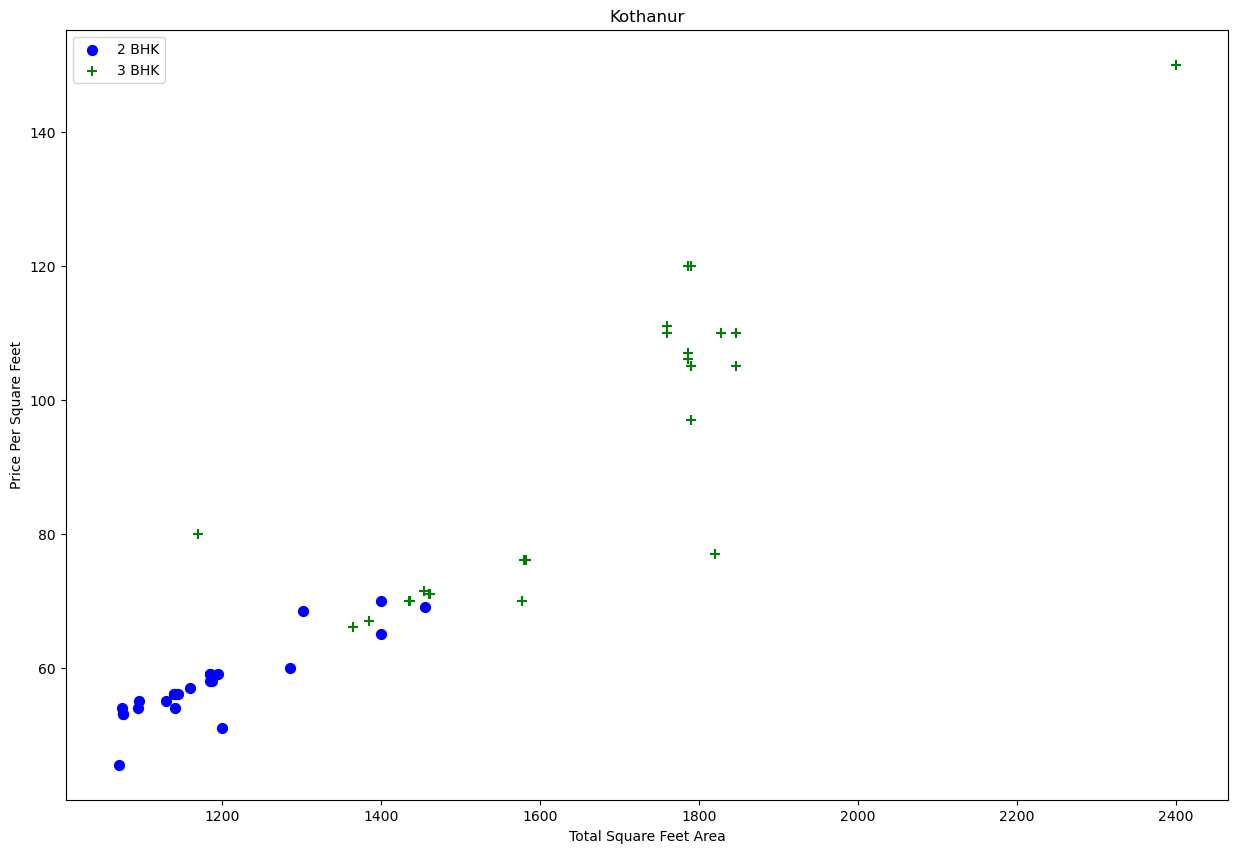

In [96]:
# Scatter plot of Kothanur

plot_scatter(data7, "Kothanur")